<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/l1_trend_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\ell_1$ trend filtering

A derivative work by Judson Wilson, 5/28/2014.<br>
Adapted from the CVX example of the same name, by Kwangmoo Koh, 12/10/2007

Topic Reference:

* S.-J. Kim, K. Koh, S. Boyd, and D. Gorinevsky, ``l_1 Trend Filtering''<br>
http://stanford.edu/~boyd/papers/l1_trend_filter.html

## Introduction

The problem of estimating underlying trends in time series data arises in a variety of disciplines. The $\ell_1$ trend filtering method produces trend estimates $x$ that are piecewise linear from the time series $y$.

The $\ell_1$ trend estimation problem can be formulated as
    \begin{array}{ll}
    \mbox{minimize}   &  (1/2)||y-x||_2^2 + \lambda ||Dx||_1,
    \end{array}
with variable $x$ , and problem data $y$ and $\lambda$, with $\lambda >0$.
$D$ is the second difference matrix, with rows 
    $$\begin{bmatrix}0 & \cdots & 0 & -1 & 2 & -1 & 0 & \cdots & 0 \end{bmatrix}.$$
CVXPY is not optimized for the $\ell_1$ trend filtering problem.
For large problems, use l1_tf (http://www.stanford.edu/~boyd/l1_tf/).

## Formulate and solve problem

In [0]:
import matplotlib.pyplot as plt
# # Show plots inline in ipython.
# %matplotlib inline

# # Plot properties.
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# font = {'weight' : 'normal',
#         'size'   : 16}
# plt.rc('font', **font)

In [0]:
import numpy as np
import cvxpy as cp
import scipy as scipy
import cvxopt as cvxopt

In [0]:
import pandas as pd

In [0]:
!wget "https://drive.google.com/uc?export=download&id=1fAFU6DMI8Xt-nF0YcAq1XPc0Hs3p88Gf" -O 'snp500.csv'

--2020-03-06 23:23:09--  https://drive.google.com/uc?export=download&id=1fAFU6DMI8Xt-nF0YcAq1XPc0Hs3p88Gf
Resolving drive.google.com (drive.google.com)... 172.217.204.138, 172.217.204.101, 172.217.204.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/itan2ib58sgfrm34rnf4ljfna5i1khjd/1583536950000/11480760788648560535/*/1fAFU6DMI8Xt-nF0YcAq1XPc0Hs3p88Gf?e=download [following]
--2020-03-06 23:23:09--  https://doc-04-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/itan2ib58sgfrm34rnf4ljfna5i1khjd/1583536950000/11480760788648560535/*/1fAFU6DMI8Xt-nF0YcAq1XPc0Hs3p88Gf?e=download
Resolving doc-04-5c-docs.googleusercontent.com (doc-04-5c-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-04-5c-docs.googleusercontent.com (d

In [0]:
!ls -l

total 408
drwxr-xr-x 1 root root   4096 Mar  3 18:11  sample_data
-rw-r--r-- 1 root root 111805 Mar  6 23:23  snp500.csv
-rw-r--r-- 1 root root 111805 Mar  6 22:34 'uc?export=download&id=1fAFU6DMI8Xt-nF0YcAq1XPc0Hs3p88Gf'
-rw-r--r-- 1 root root 111805 Mar  6 22:36 'uc?export=download&id=1fAFU6DMI8Xt-nF0YcAq1XPc0Hs3p88Gf.1'
-rw-r--r-- 1 root root  69079 Mar  6 22:21 'view?usp=sharing'


In [0]:
SPY = pd.read_csv('snp500.csv', header=None, names=['date','price'], parse_dates=['date'])

In [0]:
SPY = SPY.set_index('date')

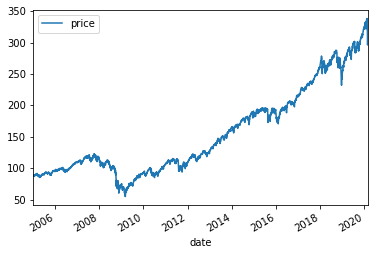

In [0]:
SPY.plot()

In [0]:
data = SPY['price']['2017':]

In [0]:
# Load time series data: S&P 500 price log.
#y = np.loadtxt(open('data/snp500.txt', 'rb'), delimiter=",", skiprows=1)
y = data.values
n = y.size

# Form second difference matrix.
e = np.ones((1, n))
D = scipy.sparse.spdiags(np.vstack((e, -2*e, e)), range(3), n-2, n)

In [0]:
len(y)

799

In [0]:
# Set regularization parameter.
vlambda = 50

# Solve l1 trend filtering problem.
x = cp.Variable(shape=n)
obj = cp.Minimize(0.5 * cp.sum_squares(y - x)
                  + vlambda * cp.norm(D*x, 1) )
prob = cp.Problem(obj)

# ECOS and SCS solvers fail to converge before
# the iteration limit. Use CVXOPT instead.
prob.solve(solver=cp.CVXOPT, verbose=True)
print('Solver status: {}'.format(prob.status))

# Check for error.
if prob.status != cp.OPTIMAL:
    raise Exception("Solver did not converge!")

print("optimal objective value: {}".format(obj.value))

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+00  2e+06  1e-01  4e-02  1e+00
 1:  2.2669e+02  2.4614e+02  2e+06  1e-01  4e-02  2e+01
 2: -1.4429e+02  3.9345e+00  2e+06  1e-01  4e-02  2e+02
 3: -6.8835e+01  7.0022e+01  1e+06  7e-02  2e-02  1e+02
 4:  4.1348e+02  5.7010e+02  1e+06  7e-02  2e-02  2e+02
 5: -1.2612e+02  1.1485e+02  6e+05  4e-02  1e-02  2e+02
 6:  7.6088e+01  2.5384e+02  4e+05  3e-02  7e-03  2e+02
 7:  9.3038e+02  1.1129e+03  4e+05  3e-02  7e-03  2e+02
 8:  8.0347e+02  8.9064e+02  2e+05  1e-02  3e-03  9e+01
 9:  1.8726e+03  1.9144e+03  7e+04  5e-03  1e-03  4e+01
10:  2.2036e+03  2.2272e+03  4e+04  3e-03  7e-04  2e+01
11:  2.7131e+03  2.7371e+03  4e+04  3e-03  7e-04  2e+01
12:  2.7184e+03  2.7314e+03  2e+04  1e-03  4e-04  1e+01
13:  3.3731e+03  3.3775e+03  7e+03  5e-04  1e-04  4e+00
14:  3.7551e+03  3.7564e+03  2e+03  1e-04  4e-05  1e+00
15:  3.8911e+03  3.8915e+03  8e+02  5e-05  1e-05  5e-01
16:  3.9436e+03  3.9439e+03  4e+02  3e-05  8e-06  

## Results plot

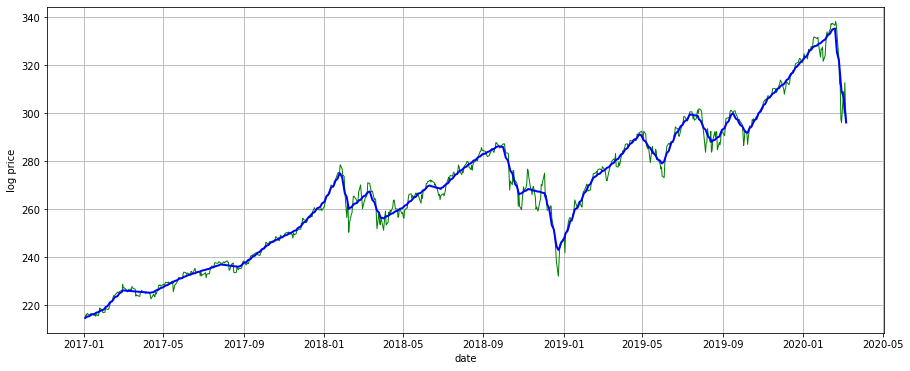

In [0]:
# Plot estimated trend with original signal.
fig,ax = plt.subplots(figsize=(15, 6))
ax.plot(data.index, y, 'g-', linewidth=1.0)
ax.plot(data.index, np.array(x.value), 'b-', linewidth=2.0)
ax.set_xlabel('date')
ax.set_ylabel('log price')
ax.grid()